In [4]:
import time
import numpy as np
from scipy import signal
from itertools import product
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import minimize

In [5]:
# Gaussian
def fct_Gauss(x,esp,sig):
    return (1/(np.sqrt(2*np.pi)*sig))*np.exp(-0.5*(x-esp)**2/sig**2)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

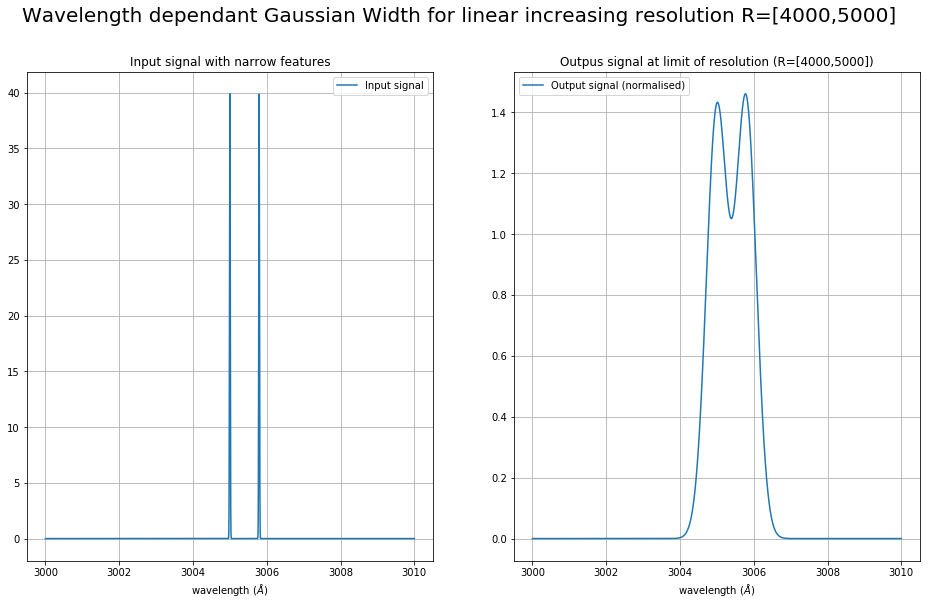

minimum local located at: [5393]
value of minimums: [1.0512030513279795]
peaks located at: [5017 5775]
value of peaks: [1.433368471579066]
contrast: [0.15381542319374975]
Distance between 2 peaks: [0, 0.7926519136857733]
Sigma of input: 0.01
Sigma of Gauss: [0.31849568 0.31848782 0.31847996 ... 0.25565592 0.25565089 0.25564586]
Sigma of output: [0.31865262 0.31864477 0.31863692 ... 0.25585142 0.25584639 0.25584137]
Integral input: 1.9999999999999958
Integral output: 1.9999999999999958
Time used: 7.808915138244629


In [38]:
###### Wavelength dependant Gaussian Width for linear increasing resolution ######
start = time. time()
######## variables changeables ########
n = 10000      # step
n_pic = 2      # number of peaks
wavelength = np.linspace(3000,3010,n)
sig_in = 0.01  # random choice (???)
R = np.linspace(4000,5000,n)           # a linear increasing resolution
######################################
dLam = wavelength/R   # dλ define the h(x) 
sig_g = dLam / np.sqrt(8*np.log(2))
sig_out = np.sqrt(sig_in**2+sig_g**2)
cste = np.sqrt(-np.log(0.37703)*8)     # calcul done by hand, d~cste*λ/R
# instead of equally position the peaks, need to find d -> 15%
position_0 = wavelength[int(n/2)]       # designate a random position of the first peak
position = [position_0]
d = [0]
for i in range(n_pic-1):
    x = np.where(wavelength == find_nearest(wavelength, position[i]))[0][0]
    position.append(position[i] + cste*sig_out[x])
    d.append(cste*sig_out[x])
######################################
# creat a narrow Gaussian input signal
f = np.zeros(n)
for i in range(n_pic):
    f += fct_Gauss(wavelength,position[i],sig_in)
# convolve with a Gaussian defined by resolution
g = np.zeros(n)
for i in range(n):
    g += f[i] * fct_Gauss(wavelength,wavelength[i],sig_g[i])
# Normalise the output flux to the input one 
g = g * np.trapz(f,wavelength) / np.trapz(g,wavelength)

plt.figure(figsize=[16,9])
plt.suptitle('Wavelength dependant Gaussian Width for linear increasing resolution R=[4000,5000]',fontsize=20)
plt.subplot(121)
plt.title("Input signal with narrow features")
plt.xlabel('wavelength ($\AA$)')
plt.plot(wavelength,f,label='Input signal')
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.title("Outpus signal at limit of resolution (R=[4000,5000])")
plt.xlabel('wavelength ($\AA$)')
plt.plot(wavelength,g,label='Output signal (normalised)')
plt.legend()
plt.grid(True)
plt.show()

### Contrast ###
# find the index of all minimums
x_min_loc = signal.argrelmin(g)[0]
print ('minimum local located at:',x_min_loc)
# find the values of these minimums
f_min_loc = []
for i in x_min_loc:
    f_min_loc.append(g[i])
print ('value of minimums:',f_min_loc)

# find the index of all the peaks
x_peaks = signal.find_peaks(g)[0]
print ('peaks located at:',x_peaks)
# values corresponding to these peaks
f_peaks = []
for i in x_peaks[0:-1]:
    f_peaks.append(g[i])
print ('value of peaks:',f_peaks)
contrast_all = []
for i in range(len(f_peaks)):
    contrast_all.append((f_peaks[i] - f_min_loc[i]) / (f_peaks[i] + f_min_loc[i]))
print('contrast:',contrast_all)
print('Distance between 2 peaks:',d)
print('Sigma of input:', sig_in)
print('Sigma of Gauss:', sig_g)
print('Sigma of output:', sig_out)
print('Integral input:', np.trapz(f,wavelength))
print('Integral output:', np.trapz(g,wavelength))
end = time. time()
print('Time used:',end - start)

In [40]:
cste

2.79346454296922

1.9999999999999982
0.9999999999999937
1.0000000000000047


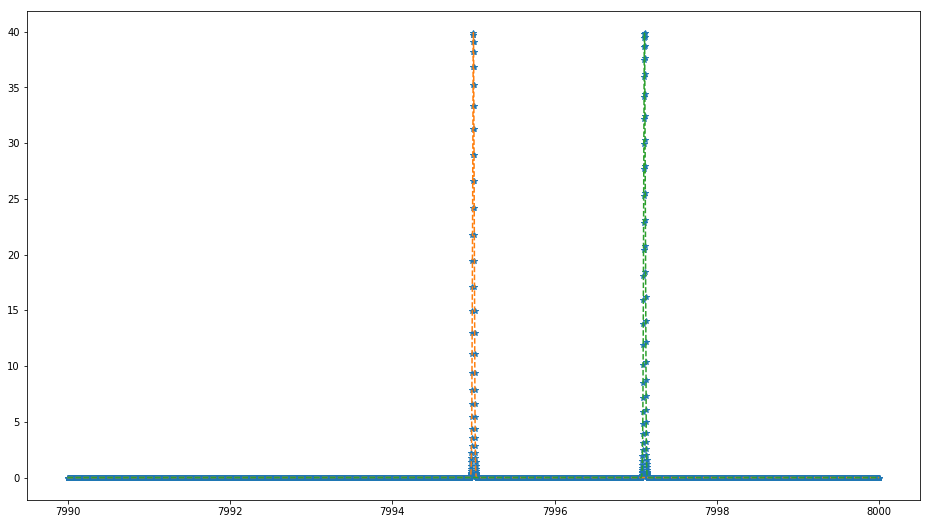

In [31]:
f0 = fct_Gauss(wavelength,position[0],sig_in)
f1 = fct_Gauss(wavelength,position[1],sig_in)
f = f0 + f1
plt.figure(figsize=[16,9])
plt.plot(wavelength,f,'*')
plt.plot(wavelength,f0,'--')
plt.plot(wavelength,f1,'--')
print(np.trapz(f,wavelength))
print(np.trapz(f0,wavelength))
print(np.trapz(f1,wavelength))

In [33]:
while f0 == 0

array([ True,  True,  True, ...,  True,  True,  True])

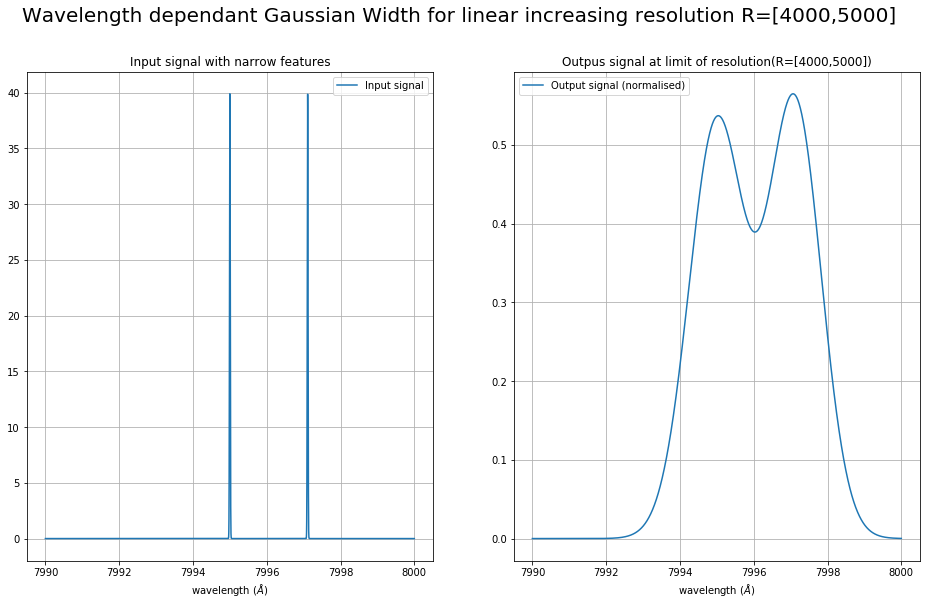

minimum local located at: [6032]
value of minimums: [0.3892802634045256]
peaks located at: [5039 7065]
value of peaks: [0.5370439966457211]
contrast: [0.15951620789158685]
Distance between 2 peaks: [0, 2.1077773779495272]
Sigma of input: 0.01
Sigma of Gauss: [0.84826015 0.84823905 0.84821795 ... 0.67948445 0.67947095 0.67945744]
Sigma of output: [0.84831909 0.84829799 0.84827689 ... 0.67955803 0.67954453 0.67953102]
Integral input: 1.9999999999999982
Integral output: 1.9999999999999982
Time used: 7.696398973464966


In [39]:
###### Wavelength dependant Gaussian Width for linear increasing resolution ######
start = time. time()
######## variables changeables ########
n = 10000      # step
n_pic = 2      # number of peaks
wavelength = np.linspace(7990,8000,n)
sig_in = 0.01  # random choice (???)
R = np.linspace(4000,5000,n)           # a linear increasing resolution
######################################
dLam = wavelength/R   # dλ define the h(x) 
sig_g = dLam / np.sqrt(8*np.log(2))
sig_out = np.sqrt(sig_in**2+sig_g**2)
cste = np.sqrt(-np.log(0.37703)*8)     # calcul done by hand, d~cste*λ/R
# instead of equally position the peaks, need to find d -> 15%
position_0 = wavelength[int(n/2)]       # designate a random position of the first peak
position = [position_0]
d = [0]
for i in range(n_pic-1):
    x = np.where(wavelength == find_nearest(wavelength, position[i]))[0][0]
    position.append(position[i] + cste*sig_out[x])
    d.append(cste*sig_out[x])
######################################
# creat a narrow Gaussian input signal
f = np.zeros(n)
for i in range(n_pic):
    f += fct_Gauss(wavelength,position[i],sig_in)
# convolve with a Gaussian defined by resolution
g = np.zeros(n)
for i in range(n):
    g += f[i] * fct_Gauss(wavelength,wavelength[i],sig_g[i])
# Normalise the output flux to the input one 
g = g * np.trapz(f,wavelength) / np.trapz(g,wavelength)

plt.figure(figsize=[16,9])
plt.suptitle('Wavelength dependant Gaussian Width for linear increasing resolution R=[4000,5000]',fontsize=20)
plt.subplot(121)
plt.title("Input signal with narrow features")
plt.xlabel('wavelength ($\AA$)')
plt.plot(wavelength,f,label='Input signal')
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.title("Outpus signal at limit of resolution(R=[4000,5000])")
plt.xlabel('wavelength ($\AA$)')
plt.plot(wavelength,g,label='Output signal (normalised)')
plt.legend()
plt.grid(True)
plt.show()

### Contrast ###
# find the index of all minimums
x_min_loc = signal.argrelmin(g)[0]
print ('minimum local located at:',x_min_loc)
# find the values of these minimums
f_min_loc = []
for i in x_min_loc:
    f_min_loc.append(g[i])
print ('value of minimums:',f_min_loc)

# find the index of all the peaks
x_peaks = signal.find_peaks(g)[0]
print ('peaks located at:',x_peaks)
# values corresponding to these peaks
f_peaks = []
for i in x_peaks[0:-1]:
    f_peaks.append(g[i])
print ('value of peaks:',f_peaks)
contrast_all = []
for i in range(len(f_peaks)):
    contrast_all.append((f_peaks[i] - f_min_loc[i]) / (f_peaks[i] + f_min_loc[i]))
print('contrast:',contrast_all)
print('Distance between 2 peaks:',d)
print('Sigma of input:', sig_in)
print('Sigma of Gauss:', sig_g)
print('Sigma of output:', sig_out)
print('Integral input:', np.trapz(f,wavelength))
print('Integral output:', np.trapz(g,wavelength))
end = time. time()
print('Time used:',end - start)